Contents <br>
<br>
I. Classification with Logistic regression <br>
II. Classification with Decision tree <br>


# I. Classification with Logistic regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

In [5]:
iris_DB =sk.datasets.load_iris()
print(iris_DB.keys())
print(iris_DB['feature_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [16]:
y = iris_DB['target']
X = iris_DB['data']
table_iris = pd.DataFrame(X, columns=iris_DB['feature_names'])
table_iris['target']= y
table_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


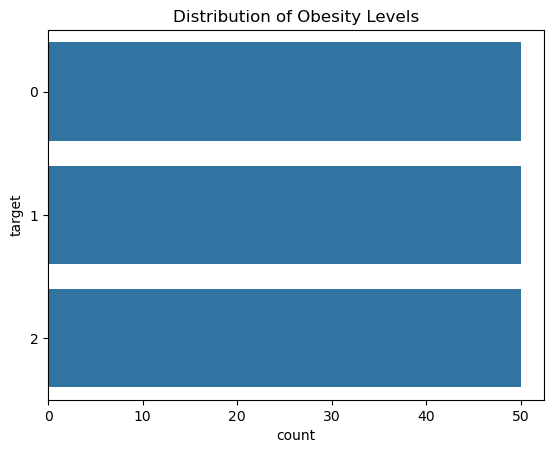

In [17]:
# Distribution of target variable
sns.countplot(y='target', data=table_iris)
plt.title('Distribution of Obesity Levels')
plt.show()

This dataset is perfectly balanced, with exactly 50 observations per category.

In [19]:
print(table_iris.info())
print(table_iris.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

In [24]:
# Standardizing continuous numerical features
continuous_columns = table_iris.select_dtypes(include=['float64']).columns.tolist()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(table_iris[continuous_columns])

In [ ]:
# Converting to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

# Combining with the original dataset
scaled_data = pd.concat([table_iris.drop(columns=continuous_columns), scaled_df], axis=1)
scaled_data

In [36]:
scaled_data['target'] = scaled_data['target'].astype('str')


In [46]:
# Identifying categorical columns

#categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
#print(categorical_columns)
#categorical_columns.remove('target')  # Exclude target column

# Applying one-hot encoding

#encoder = OneHotEncoder(sparse_output=False, drop='first')
#encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

# Converting to a DataFrame

#encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Combining with the original dataset

#prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)

In [48]:
# Encoding the target variable
scaled_data['target'] = scaled_data['target'].astype('category').cat.codes
scaled_data.head()

,target,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,-0.900681,1.019004,-1.340227,-1.315444
1,0,-1.143017,-0.131979,-1.340227,-1.315444
2,0,-1.385353,0.328414,-1.397064,-1.315444
3,0,-1.506521,0.098217,-1.283389,-1.315444
4,0,-1.021849,1.249201,-1.340227,-1.315444


In [49]:
# Preparing final dataset
X = scaled_data.drop('target', axis=1)
y = scaled_data['target']

## Split Train and Test

In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## OVA (by default)

Builds a binary model by class, estimating if it **belongs to the class or not**.

In [52]:
# Training logistic regression model using One-vs-All (default)
model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(X_train, y_train)

# Predictions
y_pred_ova = model_ova.predict(X_test)

# Evaluation metrics for OvA
print("One-vs-All (OvA) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ova),2)}%")

One-vs-All (OvA) Strategy
Accuracy: 90.0%


## OVO

Builds kC2 combinations of models, to build as many models as the number of different couples of classes. Red or blue? Red or green? etc.

In [ ]:
# Training logistic regression model using One-vs-One
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)

# Predictions
y_pred_ovo = model_ovo.predict(X_test)

# Evaluation metrics for OvO
print("One-vs-One (OvO) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ovo),2)}%")


One-vs-One (OvO) Strategy
Accuracy: 96.67%


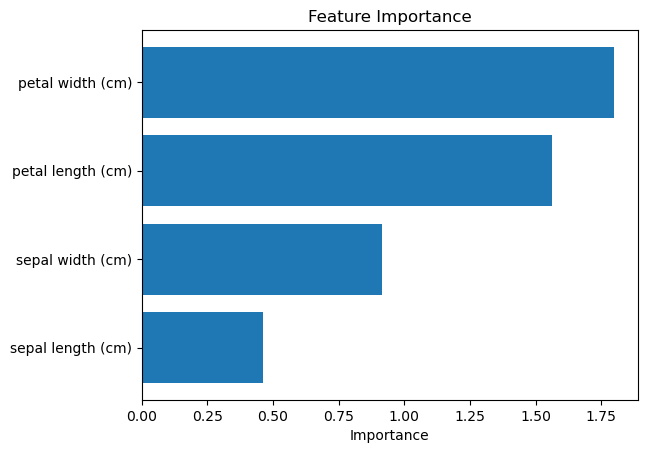

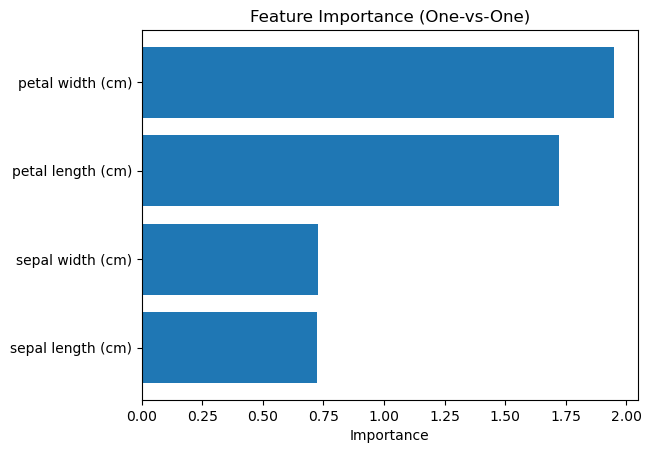

In [64]:
# Feature importance
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0)
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

# For One vs One model
# Collect all coefficients from each underlying binary classifier
coefs = np.array([est.coef_[0] for est in model_ovo.estimators_])

# Now take the mean across all those classifiers
feature_importance = np.mean(np.abs(coefs), axis=0)

# Plot feature importance
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance (One-vs-One)")
plt.xlabel("Importance")
plt.show()

# II. Classification with Decision tree


In [12]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn import tree
import sklearn as sk
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [13]:
iris_DB =sk.datasets.load_iris()
print(iris_DB.keys())
print(iris_DB['feature_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [14]:
X = iris_DB['data']
y = iris_DB['target']
table_iris = pd.DataFrame(X, columns=iris_DB['feature_names'])
table_iris['target']=y
print(table_iris.info())
print(table_iris.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

In [15]:
## If there are categorial variables, I can encode them to numeric using LabelEncoder.
## In this dataset, my target variable is already encoded and i have no categorial variable.

#label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y) 
#y

In [16]:
table_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


## Train and test split

In [17]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=32)

In [18]:
myTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
myTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Decision Trees's Accuracy:  0.9777777777777777


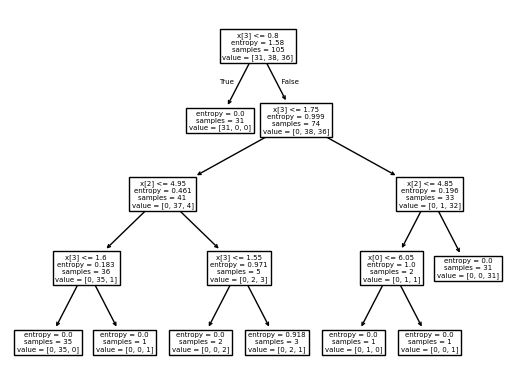

In [19]:
tree_predictions = myTree.predict(X_testset)
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, tree_predictions))
plot_tree(myTree)
plt.show()

In [20]:
tree_predictions

array([1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2,
       0])

In [21]:
y_testset

array([1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2,
       0])

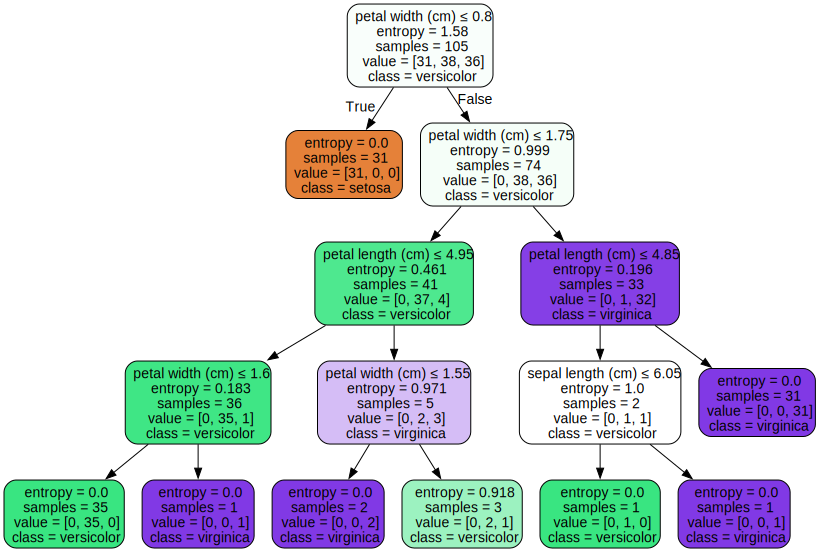

In [29]:
import graphviz 
dot_data = tree.export_graphviz(myTree, out_file=None, 
                     feature_names=iris_DB['feature_names'],  
                     class_names=iris_DB['target_names'],  
                     filled=True, rounded=True,  
                     special_characters=True)
graph = graphviz.Source(dot_data) 
#graph.render('iris')
graph

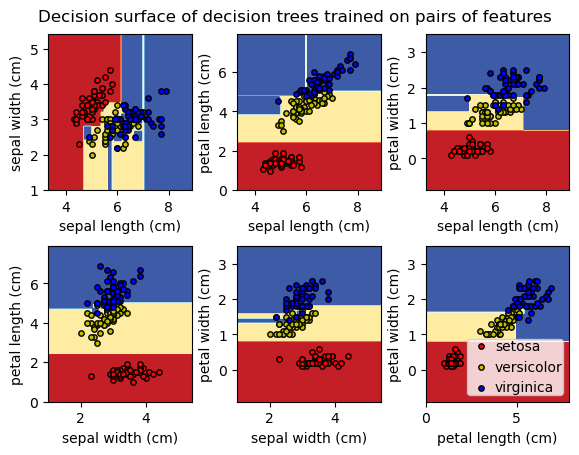

In [30]:
from sklearn.inspection import DecisionBoundaryDisplay

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):

    # We only take the two corresponding features
    X = iris_DB.data[:, pair]
    y = iris_DB.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris_DB.feature_names[pair[0]],
        ylabel=iris_DB.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.asarray(y == i).nonzero()
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris_DB.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")